In [284]:
from matplotlib import pyplot as plt
from app import Preprocessing

import torch
import torch.nn as nn

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import random

In [285]:
pre = Preprocessing('digits')
pre.load_data(filename='train.csv', name='train').tail()

,1,2,3,4,5,6,7,8,9,10,...,248,249,250,251,252,253,254,255,256,0
5827,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.000,0.013,0.206,-1.000,...,0.605,-0.027,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,1.0
5828,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.000,-1.000,-1.000,-0.060,...,-1.000,-0.196,0.965,-0.812,-1.000,-1.0,-1.0,-1.0,-1.0,4.0
5829,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-0.161,0.810,0.731,-0.341,...,-0.940,-0.128,0.682,0.893,-0.627,-1.0,-1.0,-1.0,-1.0,8.0
5830,-1.0,-1.0,0.153,0.308,-0.5,-0.5,-0.154,0.105,0.500,0.500,...,0.102,0.989,-0.091,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,7.0
5831,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-0.509,0.883,-0.445,-1.000,...,-0.125,0.842,-0.788,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,1.0


In [286]:
classes = ['0_0.0', '0_1.0', '0_2.0', '0_3.0', '0_4.0', '0_5.0', '0_6.0', '0_7.0', '0_8.0', '0_9.0']

In [287]:
X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(pre.get('train').drop(columns=['0']),
                                                      pre.get('train')['0'],
                                                      test_size=0.2)

In [288]:
#transfom to torch striuctures
dtype = torch.float
device = torch.device("cpu")

X_train = torch.tensor(X_train_df.values, device=device, dtype=dtype)
X_test = torch.tensor(X_val_df.values, device=device, dtype=dtype)

y_train = torch.tensor(y_train_df.values, device=device, dtype=dtype)
y_test = torch.tensor(y_val_df.values, device=device, dtype=dtype)

In [289]:
y_train

tensor([9., 2., 5.,  ..., 1., 1., 2.])

In [290]:
n_features = X_train.size()[1]
n_classes = len(np.unique(y_train.round().numpy()))

In [291]:
n_features, n_classes

(256, 10)

In [292]:
model = torch.nn.Sequential(
    torch.nn.Linear(n_features, n_classes),
    #torch.nn.Softmax()
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [293]:
# Zufällige initialisierung der Gewichte
w1 = torch.ones(14, 1, device=device, dtype=dtype)

learning_rate = 1e-02

In [294]:
X_train.size()[1]

256

In [439]:
X_train


tensor([[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -0.9440, -0.2840,  ..., -1.0000, -1.0000, -1.0000],
        ...,
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]])

In [440]:
index = [2,1,0]

In [442]:
X_train[index,:].size()

torch.Size([3, 256])

In [298]:
y_train.view(-1)[idx_y_train].view(y_train.size())[0:mini_batch_size-1]

tensor([8., 7., 5., 6., 2., 8., 0., 3., 8., 8., 1., 3., 6., 6., 6., 7., 9., 4.,
        0., 5., 2., 4., 9., 3., 9., 5., 4., 1., 4., 0., 4., 0., 7., 9., 5., 6.,
        4., 0., 8., 5., 0., 8., 0., 2., 5., 2., 5., 2., 3., 0., 5., 1., 3., 3.,
        3., 1., 7., 1., 9., 0., 0., 1., 0., 1., 2., 1., 7., 2., 5., 0., 0., 9.,
        2., 0., 1., 6., 5., 2., 1., 4., 7., 5., 7., 0., 3., 5., 3., 4., 2., 5.,
        7., 1., 7., 6., 6., 9., 0., 2., 6.])

In [451]:
def get_mini_batching(X_train, y_train, batch_size):
    
        X_train_col_size = X_train.size()[1]
        train_data = torch.cat((X_train, y_train.view(len(y_train), 1)), 1)
        num_rows = train_data.size()[0]
        
        idx =  torch.randperm(num_rows)
        print(idx)
        train_data_mini = train_data[idx,:][:batch_size, :]
        
        X_train_mini = train_data_mini[:,:X_train_col_size]
        y_train_mini = train_data_mini[:,X_train_col_size:]
        return X_train_mini, y_train_mini.view(len(y_train_mini))
        
        

In [389]:
train_data= torch.cat((X_train, y_train.view(len(y_train), 1)), 1)
train_data

tensor([[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000,  9.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000,  2.0000],
        [-1.0000, -0.9440, -0.2840,  ..., -1.0000, -1.0000,  5.0000],
        ...,
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000,  1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000,  1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000,  2.0000]])

In [390]:
train_data.size()

torch.Size([4665, 257])

In [391]:
4665*257

1198905

In [392]:
train_data.nelement()

1198905

In [432]:
idx =  torch.randperm(train_data.size()[0])
idx

tensor([1706, 1170, 2342,  ..., 2105, 2125, 3992])

In [434]:
train_data[idx,:].size()

torch.Size([4665, 257])

In [435]:
train_data[idx,:][:5, :]

tensor([[-1., -1., -1.,  ..., -1., -1.,  2.],
        [-1., -1., -1.,  ..., -1., -1.,  8.],
        [-1., -1., -1.,  ..., -1., -1.,  0.],
        [-1., -1., -1.,  ..., -1., -1.,  1.],
        [-1., -1., -1.,  ..., -1., -1.,  4.]])

In [396]:
y_train.size()

torch.Size([4665])

In [476]:
X_train_mini, y_train_mini = get_mini_batching(X_train, y_train, 5)

tensor([2513, 3222, 1190,  ...,  598, 2233, 3813])


In [477]:
y_train_mini

tensor([0., 3., 3., 2., 0.])

In [475]:
X_train_mini

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])

In [427]:
X_train_mini.size()

torch.Size([5, 256])

In [428]:
y_train_mini.size()

torch.Size([5])

In [429]:
y_train_mini

tensor([9., 2., 2., 2., 9.])

In [419]:
y_train_mini

tensor([9., 0., 8., 2., 1.])

In [420]:
X_train_mini

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])

In [414]:
%%time
loss_hist = []


mini_batch_size = 100
# Train
for t in range(5000):
    # Berechne die Vorhersage (foward step)
    X_train_mini, y_train_mini = get_mini_batching(X_train, y_train, mini_batch_size)
    
    outputs = model(X_train_mini)

    
    # Berechne den Fehler (Ausgabe des Fehlers alle 50 Iterationen)
    loss = criterion(outputs, y_train_mini.long())
    
    # Berechne die Gradienten und Aktualisiere die Gewichte (backward step)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Berechne den Fehler (Ausgabe des Fehlers alle 100 Iterationen)
    #if t % 50 == 0:
    #    loss_hist.append(loss.item())
    #    print(t, loss.item())

CPU times: user 14.1 s, sys: 2.17 s, total: 16.3 s
Wall time: 16.1 s


In [412]:
loss = criterion(outputs, y_train.long())

ValueError: Expected input batch_size (100) to match target batch_size (4665).

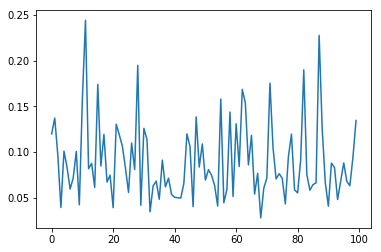

In [413]:
plt.plot(loss_hist)

In [199]:
outputs.size()

torch.Size([4665, 10])

In [200]:
y_pred = model(X_test)

In [201]:
x = X_test[0,:]

In [202]:
x.view(len(x), 1)

tensor([[-1.0000],
        [-1.0000],
        [-1.0000],
        [-0.9790],
        [ 0.7640],
        [ 0.5040],
        [-0.5610],
        [-0.4670],
        [-0.0460],
        [-0.1250],
        [ 0.2190],
        [ 0.7730],
        [ 0.5420],
        [-0.8140],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-0.9790],
        [ 0.2570],
        [ 0.9630],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 0.1650],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-0.1120],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 0.1740],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [ 0.2030],
        [ 1.0000],
        [ 0.

In [203]:
y_pred.size()

torch.Size([1167, 10])

In [204]:
y_pred[1,:]

tensor([-6.4775, -3.9660, -3.3709,  3.2512,  4.1269, -2.2671, -9.8270,  3.3184,
         3.3329, 11.2939], grad_fn=<SliceBackward>)

In [205]:
y_pred[1,:].min()

tensor(-9.8270, grad_fn=<MinBackward1>)

In [206]:
y_pred[1,:].max()

tensor(11.2939, grad_fn=<MaxBackward1>)

In [207]:
y_pred[1,:].sum()

tensor(-0.5851, grad_fn=<SumBackward0>)

In [208]:
criterion(y_pred, y_test.long()).item()

0.22793680429458618

In [209]:
softmax = torch.nn.Softmax()
y_pred = softmax(y_pred).argmax(1)
y_pred

/Users/raroito/anaconda3/envs/my_voice_predictor/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor([7, 9, 7,  ..., 2, 6, 5])

In [210]:
x = X_test[0:1,:]
print(x)


tensor([[-1.0000, -1.0000, -1.0000, -0.9790,  0.7640,  0.5040, -0.5610, -0.4670,
         -0.0460, -0.1250,  0.2190,  0.7730,  0.5420, -0.8140, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.9790,  0.2570,  0.9630,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.1650, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.1120,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.1740, -1.0000, -1.0000,
         -1.0000, -1.0000,  0.2030,  1.0000,  0.9720,  0.4730,  0.0250, -0.4250,
         -0.7560, -0.4550,  1.0000,  1.0000,  0.9200, -0.6310, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.4790,  0.9110,  0.2040, -1.0000, -1.0000, -1.0000,
         -1.0000, -0.5960,  0.9980,  1.0000,  0.3650, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -0.8810, -0.9470, -1.0000, -1.0000, -1.0000,
         -1.0000, -0.0540,  1.0000,  1.0000, -0.1770, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -

In [211]:

y_pred = softmax(model(x)).argmax(1)
y_pred

/Users/raroito/anaconda3/envs/my_voice_predictor/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor([7])

In [183]:
y_test[1].item()

5.0

In [185]:
plt.imread('')

TypeError: imread() missing 1 required positional argument: 'fname'